# Dataset 분석 (EDA)

## 모듈 Importing 및 데이터셋 불러오기

In [1]:
from torch.utils.data import Dataset
from collections import defaultdict
import json
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

train_path = "D:\Workspace\Python/boostcamp-p3-dst\data\wos/train_dataset"
test_path = "D:\Workspace\Python/boostcamp-p3-dst\data\wos/eval_dataset"

In [2]:
with open(f"{train_path}/train_dials.json", 'r', encoding='utf8') as fr:
    train_dial_data = json.load(fr)

with open(f"{train_path}/slot_meta.json", 'r', encoding='utf8') as fr:
    train_sltm_data = json.load(fr)

with open(f"{train_path}/ontology.json", 'r', encoding='utf8') as fr:
    otlg_data = json.load(fr)

with open(f"{test_path}/eval_dials.json", 'r', encoding='utf8') as fr:
    test_dial_data = json.load(fr)

with open(f"{test_path}/slot_meta.json", 'r', encoding='utf8') as fr:
    test_sltm_data = json.load(fr)

## 데이터셋 전체 설명

- 언어: 한국어
- Meta Domain: 여행
- Domain 갯수: 5
- Slot: 45 (모든 Slot은 Informable Slot)

※ 참고 사항
- Informable Slot: 특정 Knowledge Base의 instance를 찾거나, 새로운 instance를 write하기 위해 User가 System에게 주거나 맥락에 의해 User가 의도할 수 있는 타입의 정보 (대화에 대한 제약 사항 및 DST의 target)
- Requestable Slot: 특정 Knowledge Base의 instance가 선택된 이후, 추가로 정보를 요청할 수 있는 타입의 정보 (System이 User에게 제공)

## Domain 분석

Domain에 대한 정보는 각 Dialogue마다 1개씩

### Train Dataset

In [3]:
domains_counter = defaultdict(int)
domain_combs_counter = defaultdict(int)

train_domains_counter = defaultdict(int)
train_domain_combs_counter = defaultdict(int)

test_domains_counter = defaultdict(int)
test_domain_combs_counter = defaultdict(int)

In [4]:
for dialogue in train_dial_data:
    domains = sorted(dialogue["domains"])

    for domain in domains:
        domains_counter[domain] += 1
        train_domains_counter[domain] += 1
    
    domain_comb = ", ".join(domains)
    domain_combs_counter[domain_comb] += 1
    train_domain_combs_counter[domain_comb] += 1


In [5]:
print("----개별 도메인", train_domains_counter, sep=": \n")
print()
print("----조합 도메인")
for key in train_domain_combs_counter:
    print(f"{key:15}\t: {train_domain_combs_counter[key]}")

----개별 도메인: 
defaultdict(<class 'int'>, {'관광': 3732, '식당': 4020, '지하철': 650, '택시': 2374, '숙소': 3802})

----조합 도메인
관광, 식당         	: 558
관광             	: 420
관광, 식당, 지하철    	: 239
택시             	: 318
식당, 택시         	: 415
숙소, 택시         	: 405
식당             	: 479
숙소, 식당         	: 788
숙소             	: 440
관광, 택시         	: 341
관광, 숙소, 식당     	: 834
관광, 숙소         	: 457
숙소, 식당, 택시     	: 255
관광, 숙소, 지하철    	: 164
관광, 식당, 택시     	: 313
관광, 숙소, 택시     	: 327
관광, 지하철        	: 79
숙소, 식당, 지하철    	: 107
식당, 지하철        	: 32
숙소, 지하철        	: 25
지하철            	: 4


### Test Dataset

In [6]:
for dialogue in test_dial_data:
    domains = sorted(dialogue["domains"])

    for domain in domains:
        domains_counter[domain] += 1
        test_domains_counter[domain] += 1
    
    domain_comb = ", ".join(domains)
    domain_combs_counter[domain_comb] += 1
    test_domain_combs_counter[domain_comb] += 1

In [7]:
print("----개별 도메인", test_domains_counter, sep=": \n")
print()
print("----조합 도메인")
for key in test_domain_combs_counter:
    print(f"{key:15}\t: {test_domain_combs_counter[key]}")

----개별 도메인: 
defaultdict(<class 'int'>, {'관광': 1141, '숙소': 1261, '식당': 1307, '지하철': 291, '택시': 568})

----조합 도메인
관광, 숙소         	: 105
관광, 숙소, 식당     	: 384
관광             	: 112
관광, 식당, 지하철    	: 79
식당             	: 137
숙소, 식당         	: 171
관광, 식당, 택시     	: 99
숙소             	: 128
숙소, 택시         	: 61
관광, 숙소, 택시     	: 113
관광, 숙소, 지하철    	: 78
식당, 택시         	: 93
관광, 식당         	: 110
숙소, 식당, 지하철    	: 92
관광, 택시         	: 40
관광, 지하철        	: 21
택시             	: 31
숙소, 식당, 택시     	: 125
식당, 지하철        	: 11
숙소, 지하철        	: 4
식당, 지하철, 택시    	: 6


In [8]:
print("----개별 도메인", domains_counter, sep=": \n")
print()
print("----조합 도메인")
for key in domain_combs_counter:
    print(f"{key:15}\t: {domain_combs_counter[key]}")

----개별 도메인: 
defaultdict(<class 'int'>, {'관광': 4873, '식당': 5327, '지하철': 941, '택시': 2942, '숙소': 5063})

----조합 도메인
관광, 식당         	: 668
관광             	: 532
관광, 식당, 지하철    	: 318
택시             	: 349
식당, 택시         	: 508
숙소, 택시         	: 466
식당             	: 616
숙소, 식당         	: 959
숙소             	: 568
관광, 택시         	: 381
관광, 숙소, 식당     	: 1218
관광, 숙소         	: 562
숙소, 식당, 택시     	: 380
관광, 숙소, 지하철    	: 242
관광, 식당, 택시     	: 412
관광, 숙소, 택시     	: 440
관광, 지하철        	: 100
숙소, 식당, 지하철    	: 199
식당, 지하철        	: 43
숙소, 지하철        	: 29
지하철            	: 4
식당, 지하철, 택시    	: 6


In [9]:
dom_topics = [key for key in domains_counter.keys()]
dom_train_value = [train_domains_counter[key] for key in dom_topics]
dom_test_value = [test_domains_counter[key] for key in dom_topics]

cdom_topics = [key for key in domain_combs_counter.keys()]
cdom_train_value = [train_domain_combs_counter[key] for key in cdom_topics]
cdom_test_value = [test_domain_combs_counter[key] for key in cdom_topics]

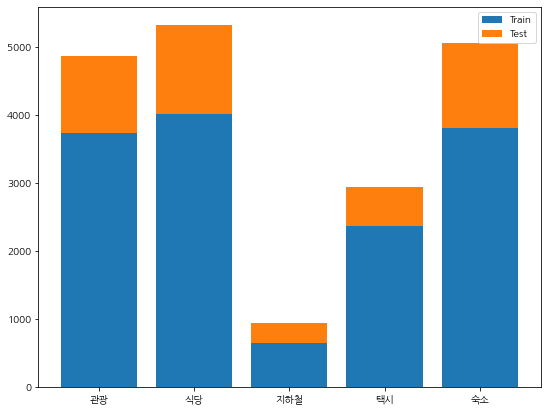

In [10]:
plt.rcParams["figure.figsize"] = (9, 7)
plt.bar(dom_topics, dom_train_value)
plt.bar(dom_topics, dom_test_value, bottom=dom_train_value)
plt.legend(['Train', 'Test'])
plt.show()

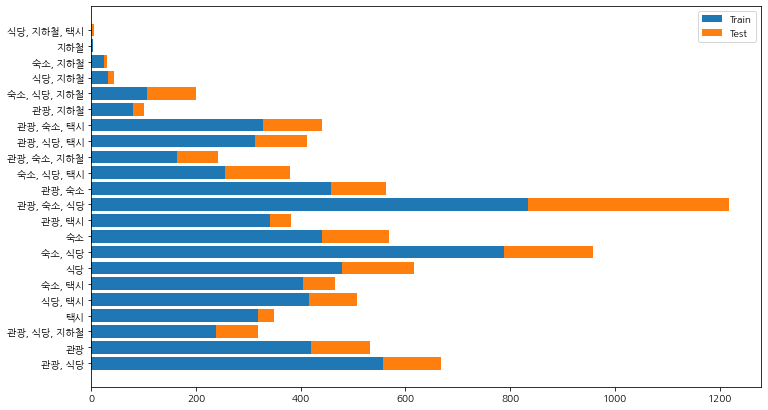

In [11]:
plt.rcParams["figure.figsize"] = (12, 7)
plt.barh(cdom_topics, cdom_train_value)
plt.barh(cdom_topics, cdom_test_value, left=cdom_train_value)
plt.legend(['Train', 'Test'])
plt.show()